Case 1
x_est_mean_ls, x_est_mean_bayes
['20.857', '20.858']


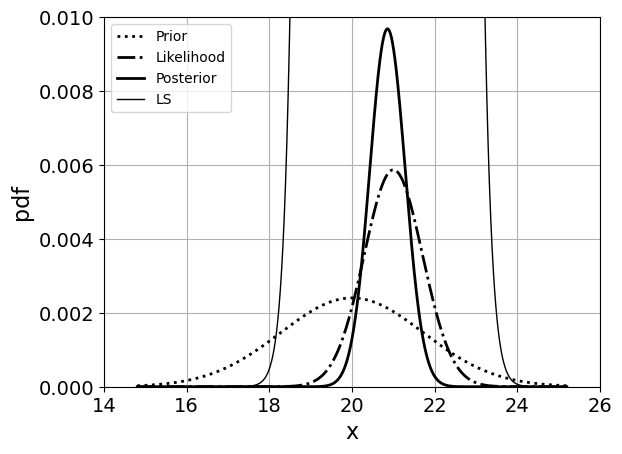


Case 2
x_est_mean_ls, x_est_mean_bayes
[20.375, 20.379698825683267]


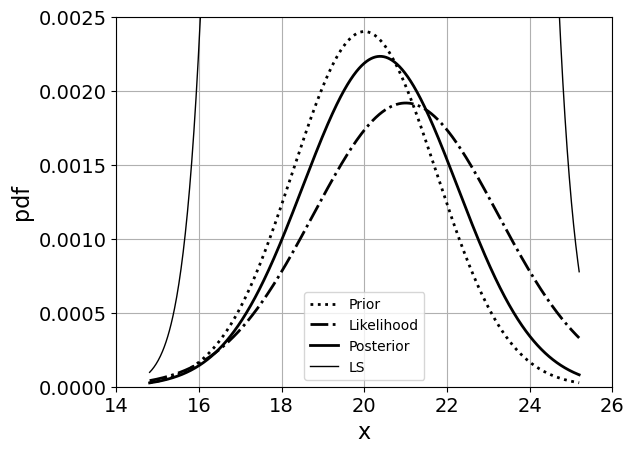

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Case 1
x_mean = 20
x_var = 3
x_err = x_var ** 0.5

yobs = np.array([19, 23])
n = len(yobs)

y_var = 1
y_err = y_var ** 0.5

y_mean = np.mean(yobs)

# From least squares
wy = x_var / (n * x_var + y_var)
wx = y_var / (n * x_var + y_var)
x_est_mean_ls = wy * yobs[0] + wy * yobs[1] + wx * x_mean
x_est_var_ls = 1 / (n / y_var + 1 / x_var)

# Bayesian formulation
nsamples = 1000
x_x = np.linspace(x_mean - 3 * x_err, x_mean + 3 * x_err, nsamples)
p_x = norm.pdf(x_x, x_mean, x_err)
p_y_x_1 = norm.pdf(x_x, yobs[0], y_err)
p_y_x_2 = norm.pdf(x_x, yobs[1], y_err)
p_y_x = p_y_x_1 * p_y_x_2
p_x_y_bayes = p_x * p_y_x
x_est_mean_bayes = x_x[np.argmax(p_x_y_bayes)]

print('Case 1')
print('x_est_mean_ls, x_est_mean_bayes')
print([f'{x_est_mean_ls:.3f}', f'{x_est_mean_bayes:.3f}'])

sigma_est_bayes = np.sqrt(np.sum(((x_x - x_est_mean_bayes) ** 2) * (p_x_y_bayes / np.sum(p_x_y_bayes))))
p_x_y_bayes1 = norm.pdf(x_x, x_est_mean_bayes, sigma_est_bayes ** 2)

# Plot
plt.figure(1)
plt.plot(x_x, p_x / np.sum(p_x), 'k:', linewidth=2, label='Prior')
plt.plot(x_x, p_y_x / np.sum(p_y_x), 'k-.', linewidth=2, label='Likelihood')
plt.plot(x_x, p_x_y_bayes1 / np.sum(p_x_y_bayes1), 'k-', linewidth=2, label='Posterior')
plt.plot(x_x, norm.pdf(x_x, x_est_mean_ls, np.sqrt(x_est_var_ls)) / np.sum(p_x_y_bayes), 'k-', linewidth=1, label='LS')
plt.xlim([14, 26])
plt.ylim([0, 0.01])
plt.xlabel('x', fontsize=16)
plt.ylabel('pdf', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

# Case 2
y_var = 10
y_err = np.sqrt(y_var)

# From least squares
wy = x_var / (n * x_var + y_var)
wx = y_var / (n * x_var + y_var)
x_est_mean_ls = wy * yobs[0] + wy * yobs[1] + wx * x_mean
x_est_var_ls = 1 / (n / y_var + 1 / x_var)

# Bayesian formulation
p_y_x_1 = norm.pdf(x_x, yobs[0], y_err)
p_y_x_2 = norm.pdf(x_x, yobs[1], y_err)
p_y_x = p_y_x_1 * p_y_x_2
p_x_y_bayes = p_x * p_y_x
x_est_mean_bayes = x_x[np.argmax(p_x_y_bayes)]
sigma_est_bayes = np.sqrt(np.sum(((x_x - x_est_mean_bayes) ** 2) * (p_x_y_bayes / np.sum(p_x_y_bayes))))
p_x_y_bayes1 = norm.pdf(x_x, x_est_mean_bayes, sigma_est_bayes ** 2)

print('\nCase 2')
print('x_est_mean_ls, x_est_mean_bayes')
print([x_est_mean_ls, x_est_mean_bayes])

# Plot
plt.figure(2)
plt.plot(x_x, p_x / np.sum(p_x), 'k:', linewidth=2, label='Prior')
plt.plot(x_x, p_y_x / np.sum(p_y_x), 'k-.', linewidth=2, label='Likelihood')
plt.plot(x_x, p_x_y_bayes1 / np.sum(p_x_y_bayes1), 'k-', linewidth=2, label='Posterior')
plt.plot(x_x, norm.pdf(x_x, x_est_mean_ls, np.sqrt(x_est_var_ls)) / np.sum(p_x_y_bayes), 'k-', linewidth=1, label='LS')
plt.xlim([14, 26])
plt.ylim([0, 0.0025])
plt.xlabel('x', fontsize=16)
plt.ylabel('pdf', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout, HBox, Label, VBox, RadioButtons
import ipywidgets as widgets

In [2]:
def all(nsamples, ):

    # Case 1
    x_mean = 20
    x_var = 3
    x_err = x_var ** 0.5

    yobs = np.array([19, 23])
    n = len(yobs)

    y_var = 1
    y_err = y_var ** 0.5

    y_mean = np.mean(yobs)

    # From least squares
    wy = x_var / (n * x_var + y_var)
    wx = y_var / (n * x_var + y_var)
    x_est_mean_ls = wy * yobs[0] + wy * yobs[1] + wx * x_mean
    x_est_var_ls = 1 / (n / y_var + 1 / x_var)

    # Bayesian formulation
    nsamples = 1000
    x_x = np.linspace(x_mean - 3 * x_err, x_mean + 3 * x_err, nsamples)
    p_x = norm.pdf(x_x, x_mean, x_err)
    p_y_x_1 = norm.pdf(x_x, yobs[0], y_err)
    p_y_x_2 = norm.pdf(x_x, yobs[1], y_err)
    p_y_x = p_y_x_1 * p_y_x_2
    p_x_y_bayes = p_x * p_y_x
    x_est_mean_bayes = x_x[np.argmax(p_x_y_bayes)]

    print('Case 1')
    print('x_est_mean_ls, x_est_mean_bayes')
    print([f'{x_est_mean_ls:.3f}', f'{x_est_mean_bayes:.3f}'])
    
    sigma_est_bayes = np.sqrt(np.sum(((x_x - x_est_mean_bayes) ** 2) * (p_x_y_bayes / np.sum(p_x_y_bayes))))
    p_x_y_bayes1 = norm.pdf(x_x, x_est_mean_bayes, sigma_est_bayes ** 2)


    layout = [
    ["A", "A", "B","B"],
    ]   
    fig, axd = plt.subplot_mosaic(layout, figsize=(15,2.5))

    print('_'*150)

    axd['A'].plot(x_x, p_x / np.sum(p_x), color='k',linestyle=':', linewidth=2, label='Prior')
    axd['A'].plot(x_x, p_y_x / np.sum(p_y_x),color='k',linestyle='.-',linewidth=2, label='Likelihood')
    axd['A'].plot(x_x, p_x_y_bayes1 / np.sum(p_x_y_bayes1),color='k',linestyle='-', linewidth=2, label='Posterior')
    axd['A'].plot(x_x, norm.pdf(x_x, x_est_mean_ls, np.sqrt(x_est_var_ls)) / np.sum(p_x_y_bayes), color='k',linestyle='-', linewidth=1, label='LS')
    axd['A'].set_xlim(14, 26)

    axd['A'].set_ylim(0, 0.01)
    axd['A'].set_xlabel('x', fontsize=16)
    axd['A'].set_ylabel('pdf', fontsize=16)
    axd['A'].legend()
    axd['A'].xticks(fontsize=14)
    axd['A'].yticks(fontsize=14)
    axd['A'].grid(linewidth=0.3)
    plt.show()

    # Case 2
    y_var = 10
    y_err = y_var ** 0.5

    # From least squares
    wy = x_var / (n * x_var + y_var)
    wx = y_var / (n * x_var + y_var)
    x_est_mean_ls = wy * yobs[0] + wy * yobs[1] + wx * x_mean
    x_est_var_ls = 1 / (n / y_var + 1 / x_var)

    # Bayesian formulation
    p_y_x_1 = norm.pdf(x_x, yobs[0], y_err)
    p_y_x_2 = norm.pdf(x_x, yobs[1], y_err)
    p_y_x = p_y_x_1 * p_y_x_2
    p_x_y_bayes = p_x * p_y_x
    x_est_mean_bayes = x_x[np.argmax(p_x_y_bayes)]
    sigma_est_bayes = np.sqrt(np.sum(((x_x - x_est_mean_bayes) ** 2) * (p_x_y_bayes / np.sum(p_x_y_bayes))))
    p_x_y_bayes1 = norm.pdf(x_x, x_est_mean_bayes, sigma_est_bayes ** 2)
    
    print('\nCase 2')
    print('x_est_mean_ls, x_est_mean_bayes')
    print([f'{x_est_mean_ls:.3f}', f'{x_est_mean_bayes:.3f}'])

    # Plot
    axd['B'].plot(x_x, p_x / np.sum(p_x), 'k:', linewidth=2, label='Prior')
    axd['B'].plot(x_x, p_y_x / np.sum(p_y_x), 'k-.', linewidth=2, label='Likelihood')
    axd['B'].plot(x_x, p_x_y_bayes1 / np.sum(p_x_y_bayes1), 'k-', linewidth=2, label='Posterior')
    axd['B'].plot(x_x, norm.pdf(x_x, x_est_mean_ls, np.sqrt(x_est_var_ls)) / np.sum(p_x_y_bayes), 'k-', linewidth=1, label='LS')
    axd['B'].set_xlim([14, 26])
    axd['B'].set_ylim([0, 0.0025])
    axd['B'].set_xlabel('x', fontsize=16)
    axd['B'].set_ylabel('pdf', fontsize=16)
    axd['B'].legend()
    axd['B'].set_xticks(fontsize=14)
    axd['B'].set_yticks(fontsize=14)
    axd['B'].grid(linewidth=0.3)
    plt.show()


sigFs = FloatSlider(min=0.0, max=10, step=0.1, value=1.0, description='Std. Dev of Background ',readout_format='.2f',
           layout=Layout(width='50%', height='20px'), style = {'description_width': '250px'})
sigRs = FloatSlider(min=0.0, max=10, step=0.1, value=0.5, description='Std. Dev of Observation ',readout_format='.2f',
           layout=Layout(width='50%', height='20px'), style = {'description_width': '250px'})

L =  IntSlider(min=10, max=1000, step=50, value=1.0, description='Length Scale ',readout_format='.0f',
           layout=Layout(width='50%', height='20px'), style = {'description_width': '250px'})



x = interactive(all, sigRs=sigRs, sigFs=sigFs, L=L)
# output = x.children[-1]
# output.layout.height = '750px'
display(x)

    

NameError: name 'np' is not defined